In [1168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [1169]:
import warnings
warnings.filterwarnings('ignore')

In [1170]:
import datetime
from scipy.stats import pearsonr

# Step1: Reading Data and Understanding Data

In [1171]:
bikedata = pd.read_csv('day.csv')

In [1063]:
bikedata.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [1064]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1065]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1066]:
bikedata.shape

(730, 16)

In [1067]:
bikedata.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1068]:
#we have 730 rows and 16 columns and no null values

## Step 2.Droping values

In [1069]:
bikedata.drop(['instant'], axis = 1, inplace = True)
bikedata.drop(['dteday'], axis = 1, inplace = True)
bikedata.drop(['casual'], axis = 1, inplace = True)
bikedata.drop(['registered'], axis = 1, inplace = True)

In [1070]:
bikedata.shape

(730, 12)

In [1071]:
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1072]:
bikedata['season'] = bikedata['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [1073]:
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1074]:
bikedata.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [1075]:
bikedata['weathersit']= bikedata.weathersit.map({1:'good',2:'moderate',3:'bad',4:'very bad'})

In [1076]:
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [1077]:
bikedata.weathersit.value_counts()

good        463
moderate    246
bad          21
Name: weathersit, dtype: int64

In [1078]:
bikedata['mnth'] = bikedata.mnth.map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [1079]:
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,1,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,2,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,3,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,4,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,5,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [1080]:
bikedata.mnth.value_counts()

jan     62
mar     62
may     62
jul     62
aug     62
oct     62
dec     62
apr     60
jun     60
sept    60
nov     60
feb     56
Name: mnth, dtype: int64

In [1081]:
bikedata.weekday = bikedata.weekday.map({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [1082]:
bikedata.weekday.value_counts()

mon    105
tue    105
wed    104
thu    104
fri    104
sat    104
sun    104
Name: weekday, dtype: int64

In [1083]:
#checking outliers from independent variables(temp,atemp,hum,windspeed)

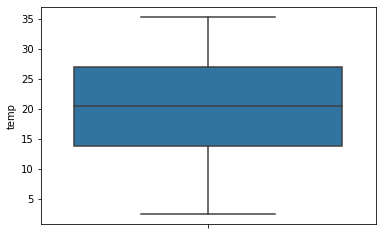

In [1084]:
temp = sns.boxplot( y="temp", data=bikedata)

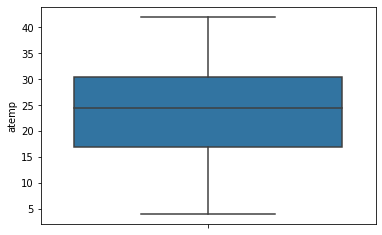

In [1085]:
atemp = sns.boxplot( y="atemp", data=bikedata)

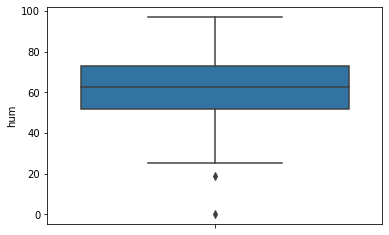

In [1086]:
hum = sns.boxplot( y="hum", data=bikedata)

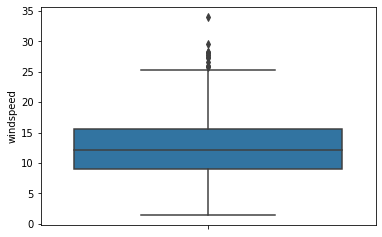

In [1087]:
windspeed = sns.boxplot( y="windspeed", data=bikedata)

In [1088]:
# we can find no outliers in them to handle

## Step 3:EDA

In [1089]:
temp = bikedata["temp"]
atemp = bikedata['atemp']
hum = bikedata['hum']
windspeed = bikedata['windspeed']

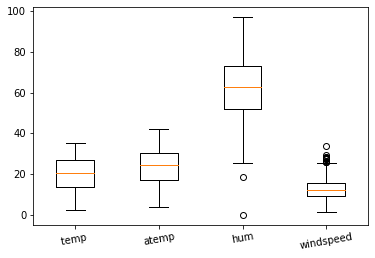

In [1090]:
columns = [temp, atemp, hum, windspeed]
fig,ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1, 2, 3, 4], ["temp ","atemp", "hum", "windspeed"], rotation=10)
plt.show()

In [1091]:
#catagorical vairables with target variables

In [1092]:
def plots(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=bikedata)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=bikedata, hue='yr',palette='Set2')
    plt.legend(labels=['2018', '2019'])
    plt.show()

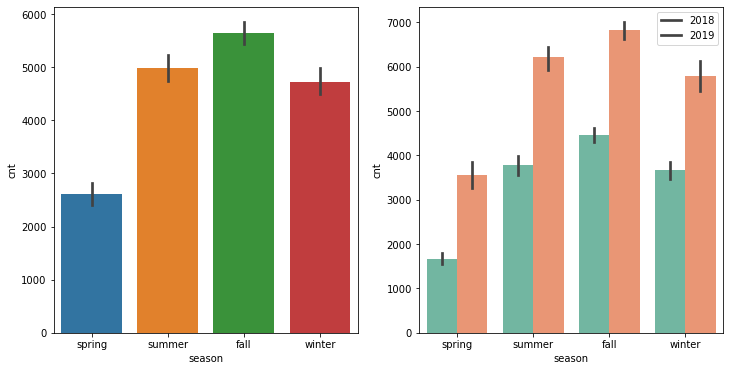

In [1093]:
plots('season')

In [1094]:
#Season:fall has highest demand for rental bikes

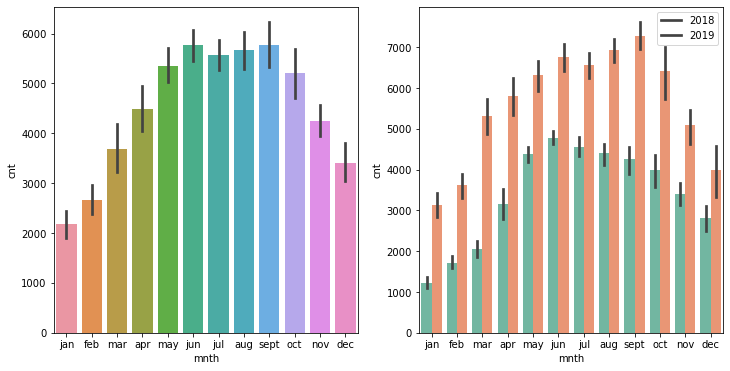

In [1095]:
plots('mnth')

In [1096]:
#Demand is continuously growing each month till June,September month has highest demand. After September, demand is decreasing

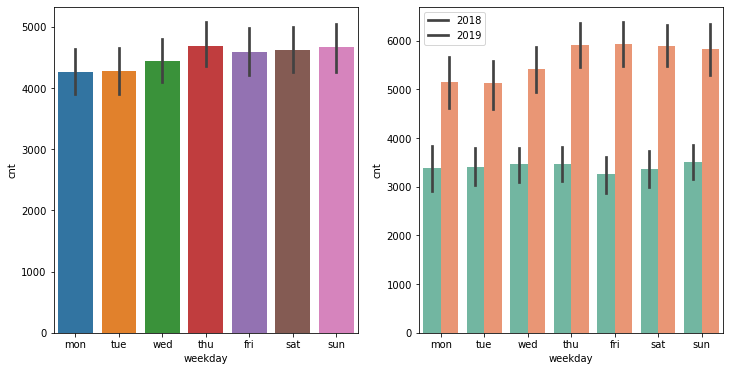

In [1097]:
plots('weekday')


In [1098]:
# Thu,Fri,Sat and Sun have more number of bookings than week starting

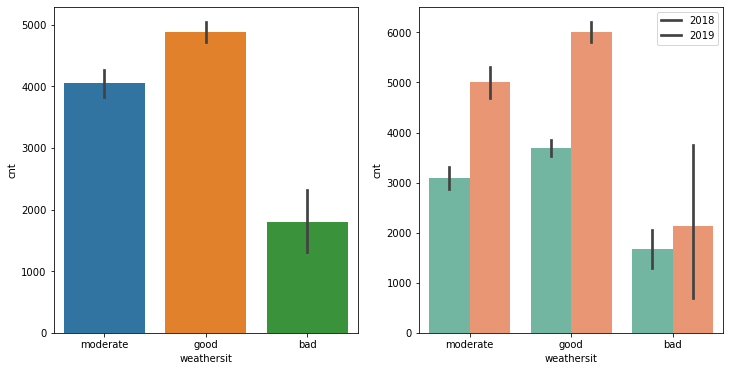

In [1100]:
plots('weathersit')

In [1101]:
# The good weathersit has highest demand

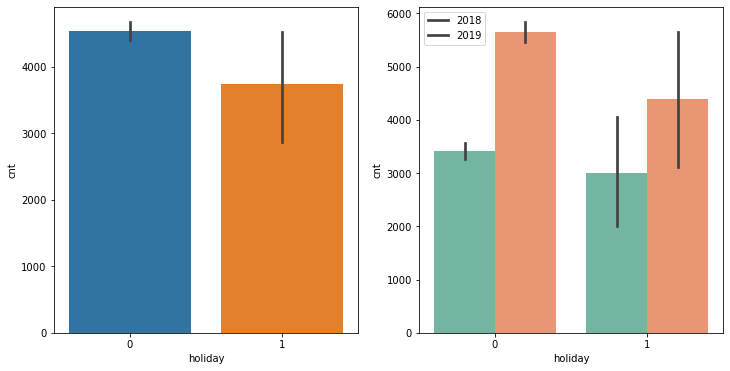

In [1102]:
plots('holiday')

In [1103]:
# When there is a holiday, demand has decreased.

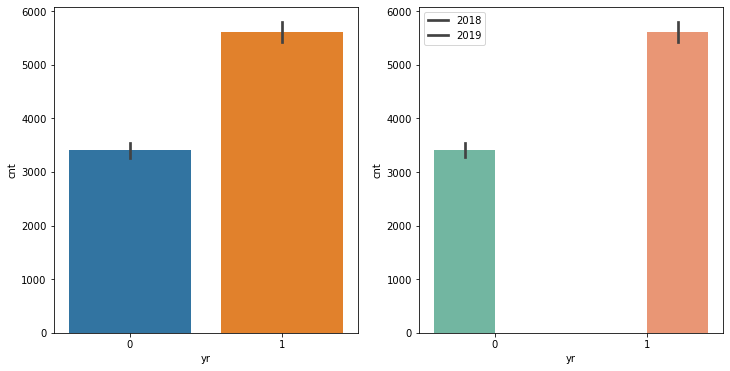

In [1104]:
plots('yr')

In [1105]:
# can find demand for next year has grown

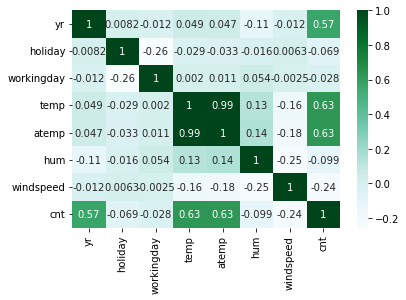

In [1106]:
#corelation for numeric variables
cor=bikedata.corr()
sns.heatmap(cor, cmap="BuGn", annot = True)
plt.show()

In [1107]:
# Looks like the temp and atemp has the highest corelation with the target variable cnt
# temp and atemp are highly co-related with each other

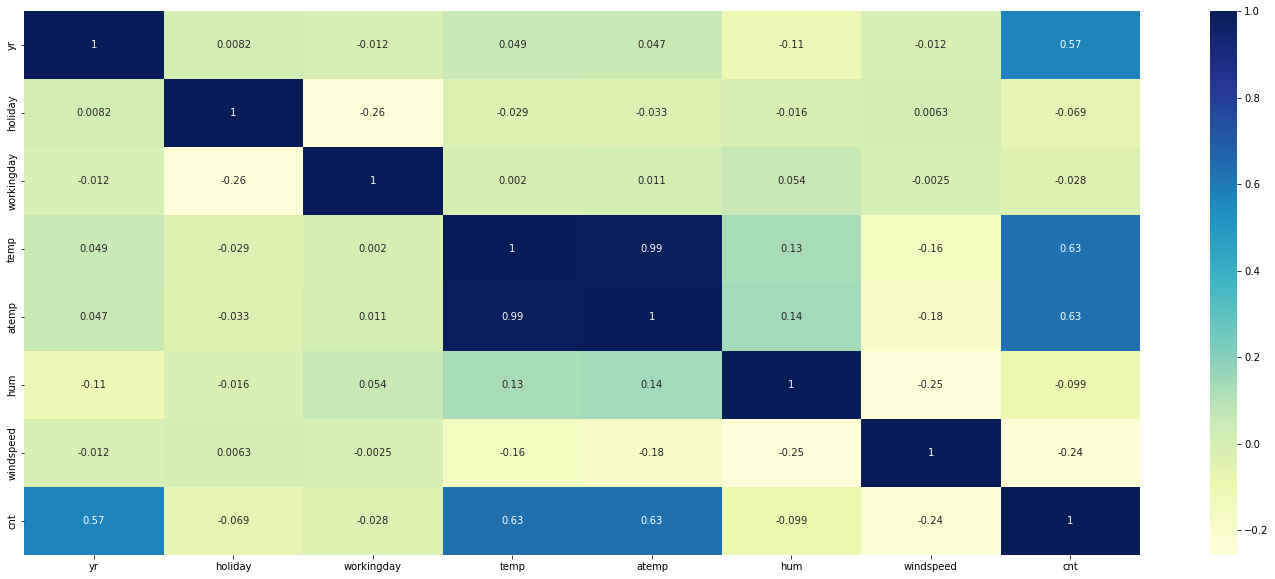

In [1108]:
corr = bikedata.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

In [1109]:
## From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
## We also see Target variable has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model

In [1110]:
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [1111]:
# Data transforming

In [1112]:
dummyvar = ['mnth','season', 'weekday', 'weathersit']

In [1113]:
newdata = pd.get_dummies(bikedata[dummyvar], drop_first=True)
newdata.head(10)

,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,...,season_summer,season_winter,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [1114]:
bikedata = pd.concat([bikedata, newdata], axis=1)

In [1115]:
bikedata = bikedata.drop(columns=dummyvar)

In [1116]:
bikedata.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,season_summer,season_winter,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,1,0


## Step 4: Splitting data

In [1118]:
bd_train, bd_test = train_test_split(bikedata, train_size=0.7, random_state=100)

In [1119]:
bd_train.shape


(510, 30)

In [1120]:
bd_test.shape

(220, 30)

## Step 5:Scaling continious variables

In [1122]:
numvar = ['temp','hum','windspeed','cnt']

In [1123]:
scaler = MinMaxScaler()

In [1124]:
bd_train[numvar] = scaler.fit_transform(bd_train[numvar])

In [1125]:
bd_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,season_summer,season_winter,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,33.1448,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,20.6746,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,11.5850,0.498067,0.663106,0.204096,0,1,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,18.8752,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,16.0977,0.751824,0.380981,0.191095,0,0,...,1,0,0,0,1,0,0,0,0,1


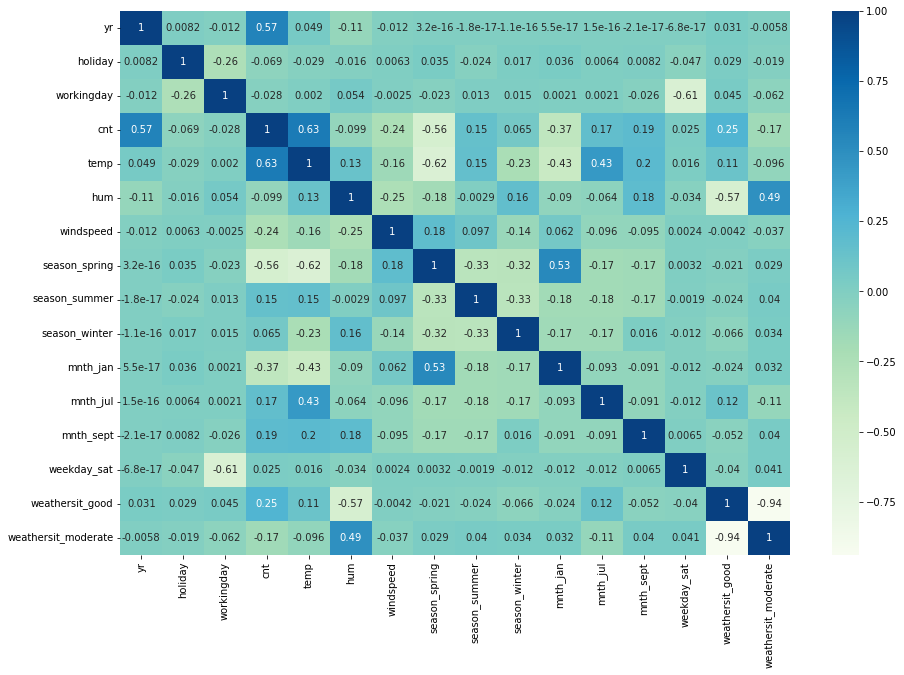

In [1126]:
bd_train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(bikedata[['yr', 'holiday', 'workingday','cnt','temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

In [1127]:
#from the above coorelation we can see cnt with temp variable and year,moderate and humidity,spring with jan

In [1128]:
y_train = bd_train.pop('cnt')
X_train = bd_train

## Step 6:Recursive feature elimination

In [1129]:
# Recursive feature elimination 

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [1130]:
rfe_data = pd.DataFrame({'Predictor': X_train.columns, 'Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_data.sort_values(by='Ranking')

,Predictor,Status,Ranking
0,yr,True,1
20,season_winter,True,1
19,season_summer,True,1
18,season_spring,True,1
17,mnth_sept,True,1
15,mnth_nov,True,1
27,weathersit_good,True,1
11,mnth_jul,True,1
10,mnth_jan,True,1
28,weathersit_moderate,True,1


In [1131]:
# after evaluating top 15 models now will build model one by one

In [1132]:
#columns finilised
columns_ = X_train.columns[rfe.support_]
print(columns_)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_dec', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sept', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')


In [1133]:
# cal vif of variables
def vifcalculations(bikedata):
    vif = pd.DataFrame()
    vif['new featurs'] = bikedata.columns
    vif['VIF'] = [variance_inflation_factor(bikedata.values, i) for i in range(bikedata.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 


In [1134]:
X_train_new = X_train[columns_]

In [1135]:
vifcalculations(X_train_new)

,new featurs,VIF
3,hum,26.33
2,temp,25.12
13,weathersit_good,15.65
14,weathersit_moderate,9.30
10,season_spring,5.75
4,windspeed,4.67
12,season_winter,4.53
11,season_summer,3.30
0,yr,2.10
8,mnth_nov,1.91


In [1136]:
X_train_sm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          8.15e-189
Time:                        17:51:42   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0732      0.048      1.540      0.124      -0.020       0.167
yr                      0.2304      0.008     28.487      0.000       0.215       0.246
holiday                -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                    0.4815      0.037     13.005      0.000       0.409       0.554
hum                    -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed              -0.1887      0.026     -7.315      0.000      -0.239      -0.138
mnth_dec               -0.0355      0.018     -2.024      0.043      -0.070      -0.001
mnth_jan               -0.0434      0.018     -2.393      0.017      -0.079      -0.008
mnth_jul               -0.0553      0.018     -3.030      0.003      -0.091      -0.019
mnth_nov               -0.0387      0.019     -2.057      0.040      -0.076      -0.002
mnth_sept               0.0755      0.017      4.466      0.000       0.042       0.109
season_spring          -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_summer           0.0423      0.015      2.761      0.006       0.012       0.072
season_winter           0.1019      0.018      5.656      0.000       0.067       0.137
weathersit_good         0.2465      0.026      9.331      0.000       0.195       0.298
weathersit_moderate     0.1922      0.025      7.687      0.000       0.143       0.241
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1137]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['hum'], axis = 1)
vifcalculations(X_train_new)

,new featurs,VIF
12,weathersit_good,15.65
2,temp,14.02
13,weathersit_moderate,8.82
3,windspeed,4.66
9,season_spring,4.41
11,season_winter,3.36
10,season_summer,2.78
0,yr,2.08
7,mnth_nov,1.89
5,mnth_jan,1.74


In [1138]:
X_train_sm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          4.75e-186
Time:                        17:51:42   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0467      0.039     -1.194      0.233      -0.124       0.030
yr                      0.2345      0.008     28.687      0.000       0.218       0.251
holiday                -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                    0.4387      0.036     12.093      0.000       0.367       0.510
windspeed              -0.1585      0.025     -6.276      0.000      -0.208      -0.109
mnth_dec               -0.0428      0.018     -2.413      0.016      -0.078      -0.008
mnth_jan               -0.0500      0.018     -2.719      0.007      -0.086      -0.014
mnth_jul               -0.0500      0.019     -2.703      0.007      -0.086      -0.014
mnth_nov               -0.0395      0.019     -2.064      0.040      -0.077      -0.002
mnth_sept               0.0687      0.017      4.015      0.000       0.035       0.102
season_spring          -0.0713      0.021     -3.314      0.001      -0.113      -0.029
season_summer           0.0349      0.015      2.251      0.025       0.004       0.065
season_winter           0.0869      0.018      4.831      0.000       0.052       0.122
weathersit_good         0.2917      0.025     11.840      0.000       0.243       0.340
weathersit_moderate     0.2117      0.025      8.462      0.000       0.163       0.261
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1139]:
X_train_new = X_train_new.drop(['mnth_nov'], axis = 1)
vifcalculations(X_train_new)

,new featurs,VIF
11,weathersit_good,14.97
2,temp,13.41
12,weathersit_moderate,8.50
3,windspeed,4.63
8,season_spring,4.35
10,season_winter,2.76
9,season_summer,2.74
0,yr,2.08
5,mnth_jan,1.72
6,mnth_jul,1.60


In [1140]:
X_train_sm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.74e-186
Time:                        17:51:42   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0596      0.039     -1.537      0.125      -0.136       0.017
yr                      0.2343      0.008     28.573      0.000       0.218       0.250
holiday                -0.0982      0.026     -3.783      0.000      -0.149      -0.047
temp                    0.4581      0.035     13.031      0.000       0.389       0.527
windspeed              -0.1594      0.025     -6.291      0.000      -0.209      -0.110
mnth_dec               -0.0283      0.016     -1.731      0.084      -0.060       0.004
mnth_jan               -0.0451      0.018     -2.467      0.014      -0.081      -0.009
mnth_jul               -0.0499      0.019     -2.686      0.007      -0.086      -0.013
mnth_sept               0.0742      0.017      4.373      0.000       0.041       0.108
season_spring          -0.0632      0.021     -2.979      0.003      -0.105      -0.022
season_summer           0.0404      0.015      2.635      0.009       0.010       0.070
season_winter           0.0774      0.017      4.438      0.000       0.043       0.112
weathersit_good         0.2878      0.025     11.677      0.000       0.239       0.336
weathersit_moderate     0.2085      0.025      8.324      0.000       0.159       0.258
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1141]:
vifcalculations(X_train_new)

,new featurs,VIF
11,weathersit_good,14.97
2,temp,13.41
12,weathersit_moderate,8.50
3,windspeed,4.63
8,season_spring,4.35
10,season_winter,2.76
9,season_summer,2.74
0,yr,2.08
5,mnth_jan,1.72
6,mnth_jul,1.60


In [1142]:
X_train_new = X_train_new.drop(['weathersit_good'], axis = 1)
vifcalculations(X_train_new)

,new featurs,VIF
2,temp,5.14
3,windspeed,4.56
8,season_spring,2.89
9,season_summer,2.24
0,yr,2.07
10,season_winter,2.02
5,mnth_jan,1.65
6,mnth_jul,1.59
11,weathersit_moderate,1.54
7,mnth_sept,1.34


In [1143]:
X_train_sm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     158.8
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.28e-161
Time:                        17:51:43   Log-Likelihood:                 440.73
No. Observations:                 510   AIC:                            -855.5
Df Residuals:                     497   BIC:                            -800.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2090      0.035      5.940      0.000       0.140       0.278
yr                      0.2397      0.009     25.955      0.000       0.222       0.258
holiday                -0.0841      0.029     -2.877      0.004      -0.142      -0.027
temp                    0.4781      0.040     12.072      0.000       0.400       0.556
windspeed              -0.1863      0.028     -6.546      0.000      -0.242      -0.130
mnth_dec               -0.0175      0.018     -0.953      0.341      -0.054       0.019
mnth_jan               -0.0377      0.021     -1.827      0.068      -0.078       0.003
mnth_jul               -0.0529      0.021     -2.524      0.012      -0.094      -0.012
mnth_sept               0.0655      0.019      3.426      0.001       0.028       0.103
season_spring          -0.0560      0.024     -2.344      0.019      -0.103      -0.009
season_summer           0.0449      0.017      2.597      0.010       0.011       0.079
season_winter           0.0675      0.020      3.434      0.001       0.029       0.106
weathersit_moderate    -0.0660      0.010     -6.762      0.000      -0.085      -0.047
==============================================================================
Omnibus:                      138.824   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              506.719
Skew:                          -1.210   Prob(JB):                    9.27e-111
Kurtosis:                       7.241   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1144]:
X_train_new = X_train_new.drop(['mnth_dec'], axis = 1)
vifcalculations(X_train_new)

,new featurs,VIF
2,temp,5.13
3,windspeed,4.56
7,season_spring,2.75
8,season_summer,2.24
0,yr,2.07
9,season_winter,1.76
4,mnth_jan,1.61
5,mnth_jul,1.59
10,weathersit_moderate,1.54
6,mnth_sept,1.33


In [1145]:
X_train_sm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.2
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.65e-162
Time:                        17:51:43   Log-Likelihood:                 440.27
No. Observations:                 510   AIC:                            -856.5
Df Residuals:                     498   BIC:                            -805.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2010      0.034      5.882      0.000       0.134       0.268
yr                      0.2396      0.009     25.955      0.000       0.222       0.258
holiday                -0.0833      0.029     -2.850      0.005      -0.141      -0.026
temp                    0.4867      0.039     12.623      0.000       0.411       0.563
windspeed              -0.1834      0.028     -6.482      0.000      -0.239      -0.128
mnth_jan               -0.0334      0.020     -1.661      0.097      -0.073       0.006
mnth_jul               -0.0532      0.021     -2.538      0.011      -0.094      -0.012
mnth_sept               0.0669      0.019      3.511      0.000       0.029       0.104
season_spring          -0.0552      0.024     -2.308      0.021      -0.102      -0.008
season_summer           0.0467      0.017      2.722      0.007       0.013       0.080
season_winter           0.0664      0.020      3.386      0.001       0.028       0.105
weathersit_moderate    -0.0660      0.010     -6.768      0.000      -0.085      -0.047
==============================================================================
Omnibus:                      136.651   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              491.388
Skew:                          -1.196   Prob(JB):                    1.98e-107
Kurtosis:                       7.172   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1146]:
X_train_new = X_train_new.drop(['mnth_jan'], axis = 1)
vifcalculations(X_train_new)

,new featurs,VIF
2,temp,5.09
3,windspeed,4.54
7,season_summer,2.23
6,season_spring,2.08
0,yr,2.06
8,season_winter,1.75
4,mnth_jul,1.58
9,weathersit_moderate,1.53
5,mnth_sept,1.33
1,holiday,1.04


In [1147]:
X_train_sm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          7.37e-163
Time:                        17:51:43   Log-Likelihood:                 438.86
No. Observations:                 510   AIC:                            -855.7
Df Residuals:                     499   BIC:                            -809.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1871      0.033      5.638      0.000       0.122       0.252
yr                      0.2390      0.009     25.862      0.000       0.221       0.257
holiday                -0.0840      0.029     -2.868      0.004      -0.142      -0.026
temp                    0.5032      0.037     13.479      0.000       0.430       0.577
windspeed              -0.1771      0.028     -6.307      0.000      -0.232      -0.122
mnth_jul               -0.0546      0.021     -2.607      0.009      -0.096      -0.013
mnth_sept               0.0673      0.019      3.527      0.000       0.030       0.105
season_spring          -0.0600      0.024     -2.524      0.012      -0.107      -0.013
season_summer           0.0494      0.017      2.887      0.004       0.016       0.083
season_winter           0.0718      0.019      3.703      0.000       0.034       0.110
weathersit_moderate    -0.0669      0.010     -6.849      0.000      -0.086      -0.048
==============================================================================
Omnibus:                      136.365   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.625
Skew:                          -1.193   Prob(JB):                    2.90e-107
Kurtosis:                       7.171   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1148]:
X_train_new = X_train_new.drop(['season_spring'], axis = 1)
vifcalculations(X_train_new)

,new featurs,VIF
2,temp,5.06
3,windspeed,3.03
0,yr,2.00
6,season_summer,1.76
4,mnth_jul,1.52
8,weathersit_moderate,1.47
7,season_winter,1.43
5,mnth_sept,1.28
1,holiday,1.03


In [1149]:
X_train_sm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     207.7
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.16e-162
Time:                        17:51:43   Log-Likelihood:                 435.63
No. Observations:                 510   AIC:                            -851.3
Df Residuals:                     500   BIC:                            -808.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1180      0.019      6.269      0.000       0.081       0.155
yr                      0.2377      0.009     25.627      0.000       0.220       0.256
holiday                -0.0863      0.029     -2.933      0.004      -0.144      -0.029
temp                    0.5735      0.025     22.963      0.000       0.524       0.623
windspeed              -0.1823      0.028     -6.474      0.000      -0.238      -0.127
mnth_jul               -0.0441      0.021     -2.134      0.033      -0.085      -0.004
mnth_sept               0.0809      0.018      4.391      0.000       0.045       0.117
season_summer           0.0796      0.012      6.467      0.000       0.055       0.104
season_winter           0.1107      0.012      9.370      0.000       0.088       0.134
weathersit_moderate    -0.0663      0.010     -6.756      0.000      -0.086      -0.047
==============================================================================
Omnibus:                      128.223   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.568
Skew:                          -1.150   Prob(JB):                     2.87e-92
Kurtosis:                       6.814   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1150]:
## error distribution

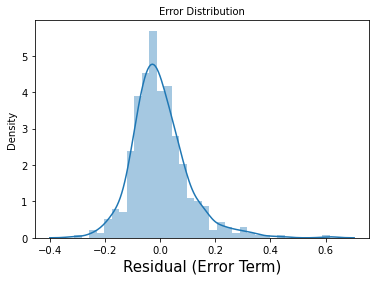

In [1151]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 15})
plt.title('Error Distribution', fontdict={'fontsize': 10})
plt.show()

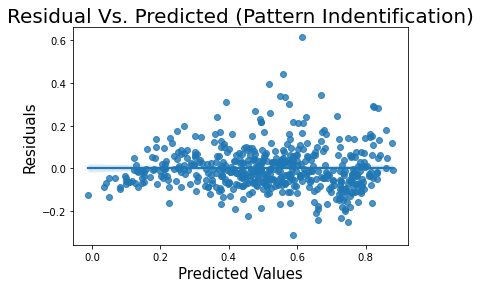

In [1152]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [1153]:
# No visible pattern observed from above plot for residuals

In [1155]:
# making predictions using final model

In [1156]:
num_var = ['temp','hum','windspeed','cnt']
bd_test[num_var] = scaler.transform(bd_test[num_var])
bd_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,season_summer,season_winter,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,33.27085,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,36.04875,0.610133,0.153728,0.712034,0,0,...,1,0,0,0,0,1,0,0,1,0
299,0,0,0,0.511964,22.85230,0.837699,0.334206,0.303382,0,0,...,0,1,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,34.24915,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.817246,32.19710,0.314298,0.537414,0.569029,0,0,...,1,0,0,1,0,0,0,0,1,0


In [1157]:
y_test = bd_test.pop('cnt')
X_test = bd_test

In [1159]:
X_test= X_test[X_train_new.columns]
X_test = sm.add_constant(X_test)

In [1160]:
# predecting test data using developed model

In [1162]:
y_test_pred = lr_model.predict(X_test)

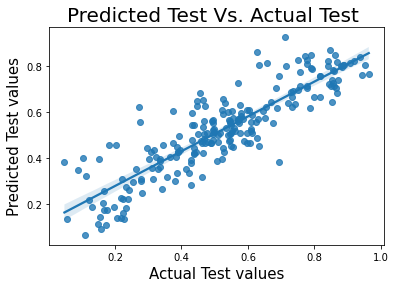

In [1164]:
corrrelation = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test Vs. Actual Test ', fontdict={'fontsize': 20})
plt.xlabel('Actual Test values', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test values', fontdict={'fontsize': 15})
plt.show()


In [1166]:
## above plot Shows Linear Relationship between Actual Test Data values & Predicted Test Data values

In [ ]:
# genrating R square

In [1198]:
r2_train=r2_score(y_train, y_train_pred)
r2_train

0.7889763516198882

In [1200]:
r2=r2_score(y_test, y_test_pred)
r2

0.7681341233124648

## Step 8:Model Evaluation

Text(0, 0.5, 'y_test_pred')

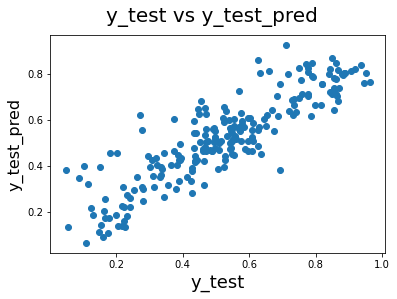

In [1201]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 

In [1202]:
round(lr_model.params,4) 

const                  0.1180
yr                     0.2377
holiday               -0.0863
temp                   0.5735
windspeed             -0.1823
mnth_jul              -0.0441
mnth_sept              0.0809
season_summer          0.0796
season_winter          0.1107
weathersit_moderate   -0.0663
dtype: float64

#### cnt=0.1180+0.2377*yr-0.0863*holiday+0.5735*temp-0.1823*windspeed-0.0441*mnth_jul+0.0809*mnth_sept+0.0796*season_summer+0.1107*season_winter-0.0663*weathersit_moerate

In [1206]:
adjusted_r2_train = round(1-(1-r2_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
print(adjusted_r2_train)

0.7762


In [1207]:
# Calculating R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)


0.757


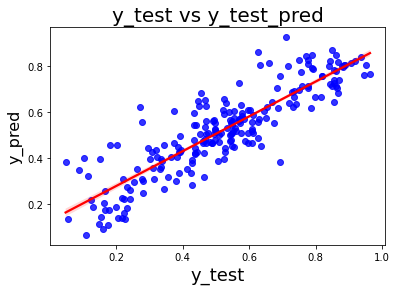

In [1208]:
## plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [ ]:
Comparision of Training and Testing dataset:
- Train dataset R^2          : 0.788
- Test dataset R^2           : 0.768
- Train dataset Adjusted R^2 : 0.7762    
- Test dataset Adjusted R^2  : 0.757